<a href="https://colab.research.google.com/github/yeonmi02/machine-learning-practice/blob/main/250409_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비하기

In [1]:
import pandas as pd
# 데이터 셋 가져오기
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 특정 열에 존재하는 유니크한 데이터 출력
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# 정답을 제외한 특성을 배열로 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [6]:
print(fish_input[:5]) # 0번째부터 5번째까지의 행을 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
# 타켓값 y값에 대해서도 배열로 변환하는 코드
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
# 실제 훈련 데이터셋과 테스트 데이터셋을 분류
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42) # 랜덤하게 섞어줌

In [9]:
# 표준화 시키기위해 인포트를 하는 과정
from sklearn.preprocessing import StandardScaler
# 표준화 작업 코드
ss = StandardScaler()
ss.fit(train_input) # 학습시키는 fit 아님
train_scaled = ss.transform(train_input) # 훈련 데이터를 기준으로 스케일링 한다.
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# 이웃의 설정을 3으로 함
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target) # 학습시키는 fit
# 정확도 출력
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [12]:
print(kn.classes_) #알파벳순

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
# 테스트 데이터 5개를 예측한 값
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [15]:
import numpy as np
# 확률을 출력하는 코드
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # round - 소수점 넷째자리까지 표기 (다섯째자리 반올림)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [16]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

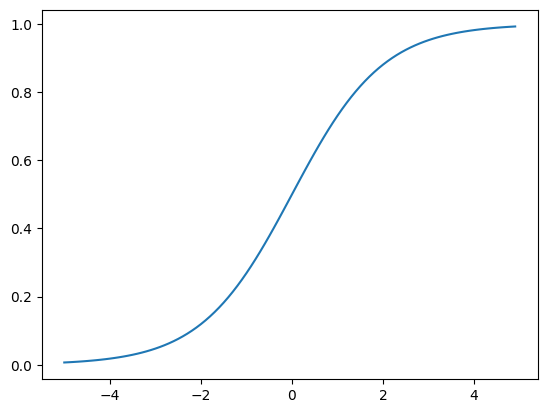

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# z값을 x축으로
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수 수식

plt.plot(z, phi)
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

- 도미와 빙어 데이터만 가지고 분류 수행

In [18]:
# TRUE만 배열로 뽑아주는 코드
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [19]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 도미와 빙어만
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [20]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression 정의
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt) # 훈련 시키기

LogisticRegression()

In [21]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
print(lr.predict_proba(train_bream_smelt[:5])) # 어떠한 확률로 분류하게 되는지 확인 가능

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [24]:
print(lr.classes_) # 타깃값 속성

['Bream' 'Smelt']


In [25]:
print(lr.coef_, lr.intercept_) # 가중치와 편향

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [27]:
# z값
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [28]:
from scipy.special import expit

print(expit(decisions)) #라이브러리에서 제공하는 시그모이드

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


### 로지스틱 회귀로 다중 분류 수행하기

In [34]:
lr = LogisticRegression(C=20, max_iter=1000) # 규제 완화를 위해 C값 증가 default 1
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)) # 평가하는 내용
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [30]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [31]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [36]:
print(lr.classes_) # 타켓 클래스 총 7개

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [37]:
print(lr.coef_.shape, lr.intercept_.shape) # 가중치와 편향값

(7, 5) (7,)


In [35]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2)) # 선형 방정식 z값

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [38]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
